Global Power Plant Database
Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 
Downlaod Files:

    https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from scipy.stats import zscore

In [30]:
df=pd.read_csv('Global Power Plant Database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

<AxesSubplot:>

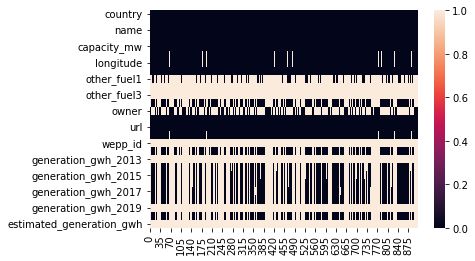

In [32]:
sns.heatmap(df.isnull().transpose())

In [33]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# Null values:
- There are 907 row in the dataset,
- And there are columns that have Null values in the entire dataset i.e. 907 rows or close to this number, hence we will drop them.
- Since 'other_fuel1' has more than 70% null values in dataset, it will be removed.
- Columns not needed will be removed

In [34]:
df. drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013',
          'generation_gwh_2019','estimated_generation_gwh','other_fuel1','owner','generation_data_source'], axis=1, inplace=True)

In [35]:
df['generation_gwh_2014'].fillna(0, inplace = True)
df['generation_gwh_2015'].fillna(0, inplace = True)
df['generation_gwh_2016'].fillna(0, inplace = True)
df['generation_gwh_2017'].fillna(0, inplace = True)
df['generation_gwh_2018'].fillna(0, inplace = True)
df['commissioning_year'].fillna(0,inplace=True)
df['year_of_capacity_data'].fillna(0,inplace=True)
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                 46
longitude                46
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source       19
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
dtype: int64

In [36]:
df.dropna(inplace=True)

<AxesSubplot:>

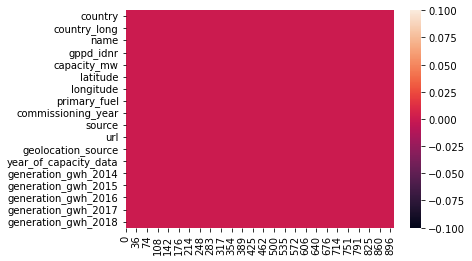

In [37]:
sns.heatmap(df.isnull().transpose())

# Applying Encoder

In [38]:
df.select_dtypes(['object']).columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'source', 'url', 'geolocation_source'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
for i in col:
    df[i]=le.fit_transform(df[i])

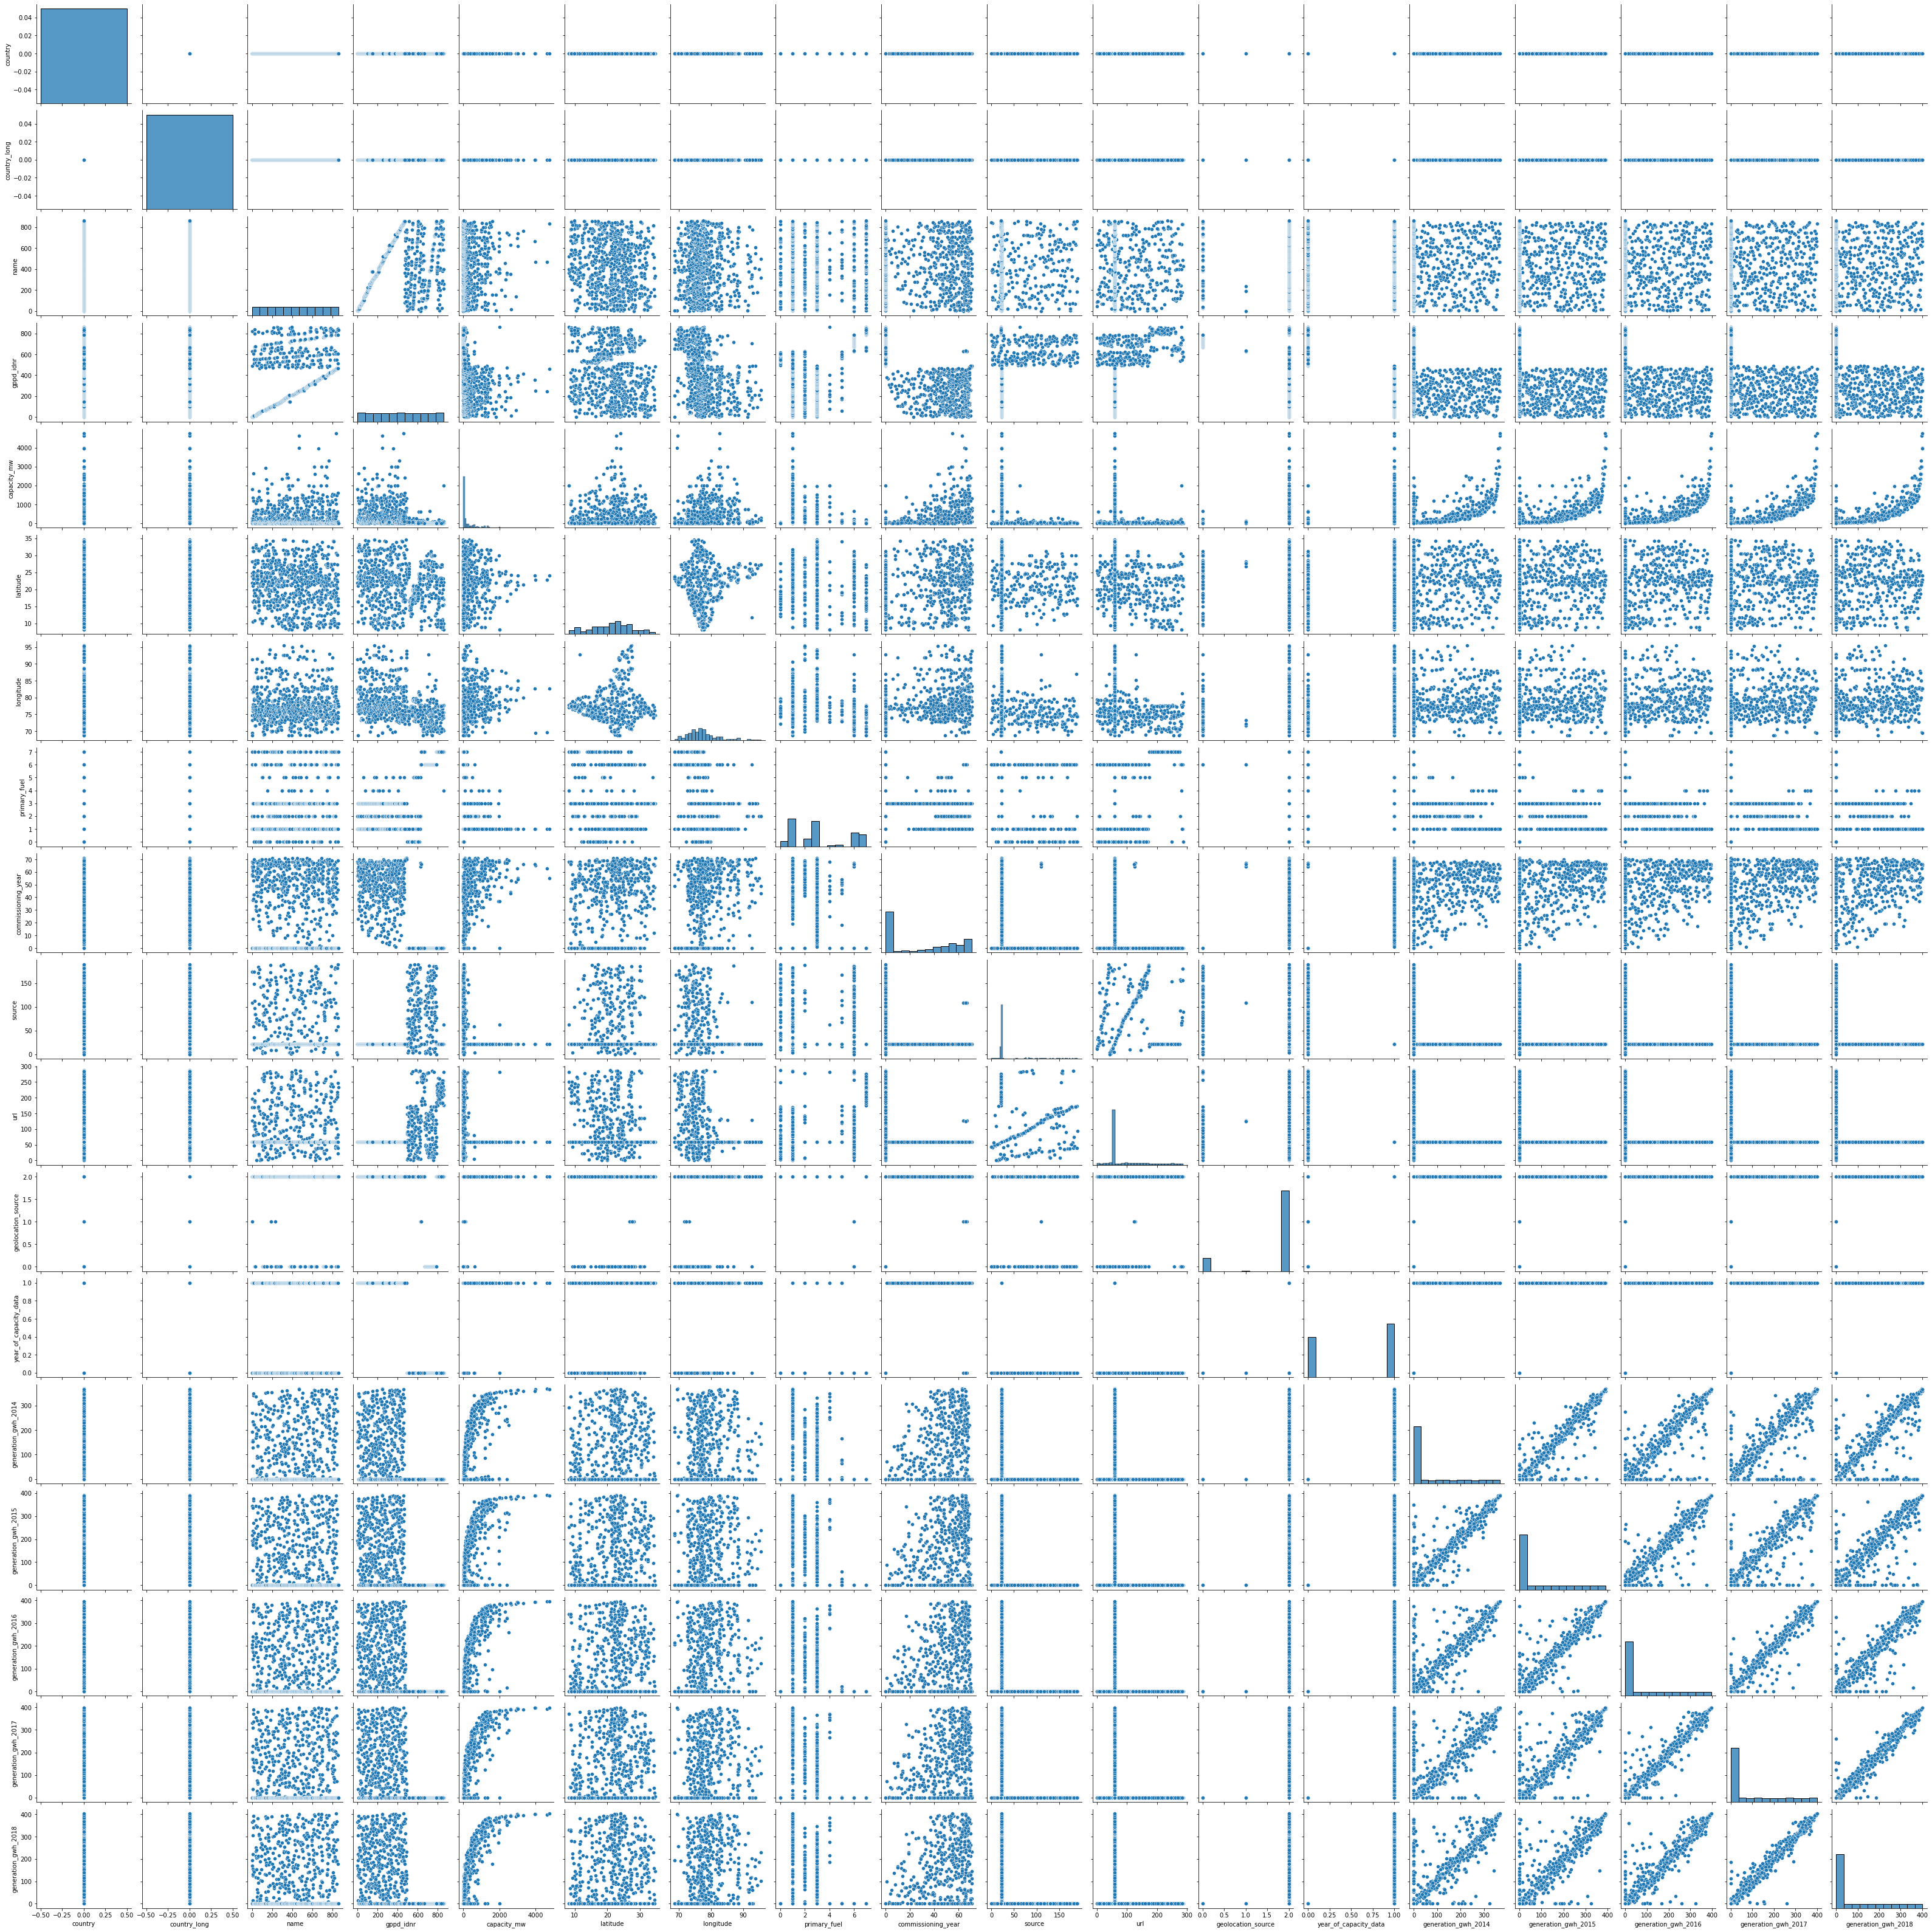

In [40]:
sns.pairplot(df)

In [25]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


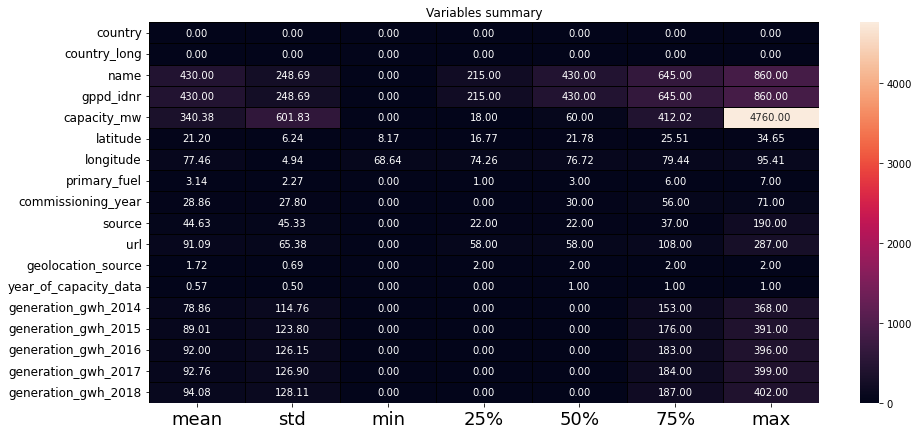

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variables summary')
plt.savefig('heatmap.png')
plt.show()

# Correlation

In [43]:
df.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.322383,0.069734,-0.138827,0.020632,0.028894,0.008252,-0.005428,0.019908,0.033993,0.036430,0.050472,0.035783,0.039777,0.041171,0.040908
gppd_idnr,NaN,NaN,0.322383,1.000000,-0.343170,-0.109108,-0.390448,0.600834,-0.740905,0.432367,0.580440,-0.484534,-0.857143,-0.528010,-0.561564,-0.560493,-0.549631,-0.546837
capacity_mw,NaN,NaN,0.069734,-0.343170,1.000000,0.051309,0.197129,-0.378447,0.510340,-0.254236,-0.244415,0.216595,0.430448,0.683499,0.725890,0.764454,0.787854,0.788532
latitude,NaN,NaN,-0.138827,-0.109108,0.051309,1.000000,0.036362,-0.010530,0.127427,0.056528,-0.136152,-0.185045,0.081304,0.115160,0.120282,0.134308,0.143857,0.134454
longitude,NaN,NaN,0.020632,-0.390448,0.197129,0.036362,1.000000,-0.359060,0.426704,-0.241907,-0.315740,0.253397,0.438565,0.257469,0.286706,0.327841,0.336030,0.338406
primary_fuel,NaN,NaN,0.028894,0.600834,-0.378447,-0.010530,-0.359060,1.000000,-0.485618,0.060286,0.567925,-0.512705,-0.485078,-0.405840,-0.436320,-0.454695,-0.460386,-0.457330
commissioning_year,NaN,NaN,0.008252,-0.740905,0.510340,0.127427,0.426704,-0.485618,1.000000,-0.497635,-0.514592,0.406138,0.877282,0.554612,0.609401,0.648215,0.658629,0.662428
source,NaN,NaN,-0.005428,0.432367,-0.254236,0.056528,-0.241907,0.060286,-0.497635,1.000000,0.180698,-0.506295,-0.576705,-0.343395,-0.359290,-0.364471,-0.365288,-0.366981


<AxesSubplot:>

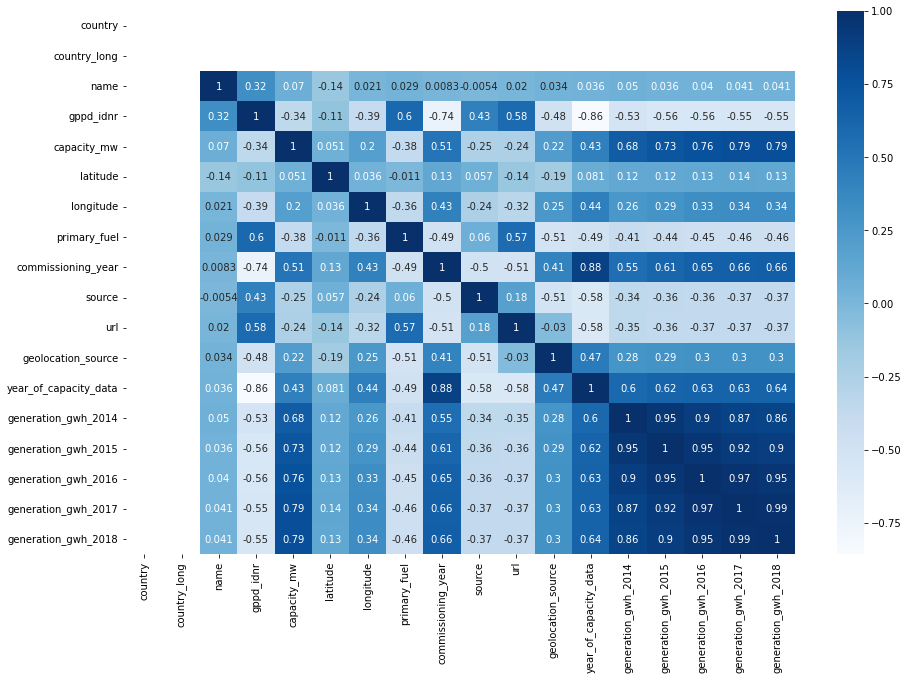

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [47]:
df.corr()['primary_fuel'].sort_values()

geolocation_source      -0.512705
commissioning_year      -0.485618
year_of_capacity_data   -0.485078
generation_gwh_2017     -0.460386
generation_gwh_2018     -0.457330
generation_gwh_2016     -0.454695
generation_gwh_2015     -0.436320
generation_gwh_2014     -0.405840
capacity_mw             -0.378447
longitude               -0.359060
latitude                -0.010530
name                     0.028894
source                   0.060286
url                      0.567925
gppd_idnr                0.600834
primary_fuel             1.000000
country                       NaN
country_long                  NaN
Name: primary_fuel, dtype: float64

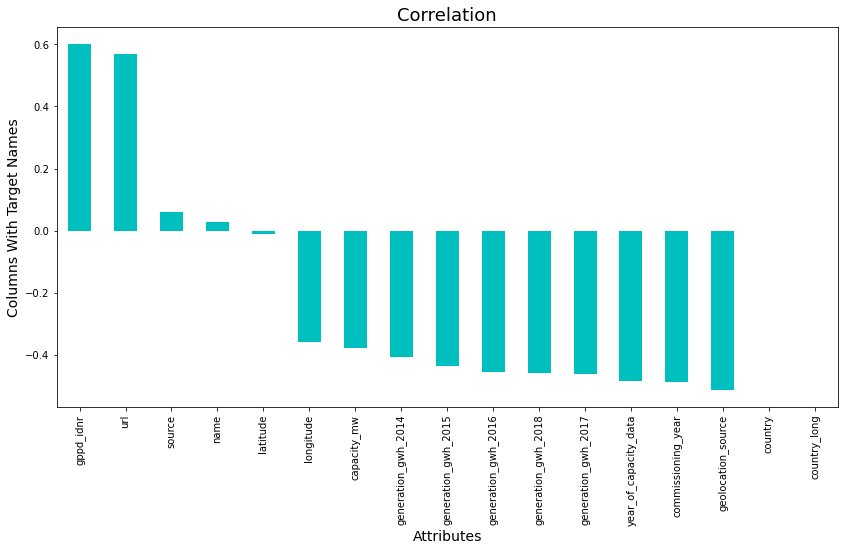

In [49]:
plt.figure(figsize=(14,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Attributes',fontsize=14)
plt.ylabel('Columns With Target Names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [50]:
df.corr()['capacity_mw'].sort_values()

primary_fuel            -0.378447
gppd_idnr               -0.343170
source                  -0.254236
url                     -0.244415
latitude                 0.051309
name                     0.069734
longitude                0.197129
geolocation_source       0.216595
year_of_capacity_data    0.430448
commissioning_year       0.510340
generation_gwh_2014      0.683499
generation_gwh_2015      0.725890
generation_gwh_2016      0.764454
generation_gwh_2017      0.787854
generation_gwh_2018      0.788532
capacity_mw              1.000000
country                       NaN
country_long                  NaN
Name: capacity_mw, dtype: float64

In [55]:
df.drop(['country','country_long'],axis=1,inplace=True)

# Outliers

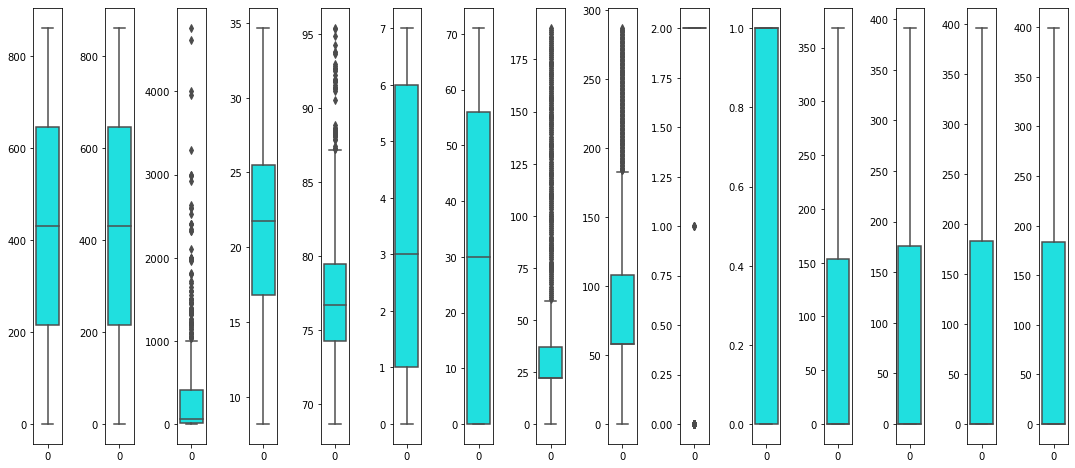

In [56]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)-1):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='cyan',orient='v')
    plt.tight_layout()

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df.iloc[:,:11]))
z.shape

(861, 11)

In [60]:
threshold=3
np.where(z>3)

(array([ 14,  66, 137, 141, 172, 176, 184, 234, 288, 297, 310, 312, 319,
        326, 346, 349, 350, 361, 401, 410, 459, 469, 470, 494, 549, 610,
        620, 628, 632, 640, 658, 664, 692, 730, 743, 745, 765, 775, 788,
        835, 836, 849, 854], dtype=int64),
 array([2, 7, 2, 2, 4, 4, 7, 4, 7, 2, 7, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2,
        2, 4, 4, 4, 2, 2, 7, 7, 7, 2, 2, 2, 2, 2, 2, 4, 7, 7, 2, 7, 7],
       dtype=int64))

In [61]:
len(np.where(z>3)[0])

43

In [62]:
df_new=df[(z<3).all(axis=1)]

In [63]:
x=df_new.drop(['primary_fuel'],axis=1)
y=df_new['primary_fuel']

# Checking Skewness

In [64]:
x.skew()

name                     0.005515
gppd_idnr               -0.020206
capacity_mw              1.947665
latitude                -0.113835
longitude                0.946692
commissioning_year       0.183906
source                   1.768981
url                      1.478530
geolocation_source      -2.071721
year_of_capacity_data   -0.256830
generation_gwh_2014      1.208778
generation_gwh_2015      1.116139
generation_gwh_2016      1.084078
generation_gwh_2017      1.083667
generation_gwh_2018      1.066594
dtype: float64

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

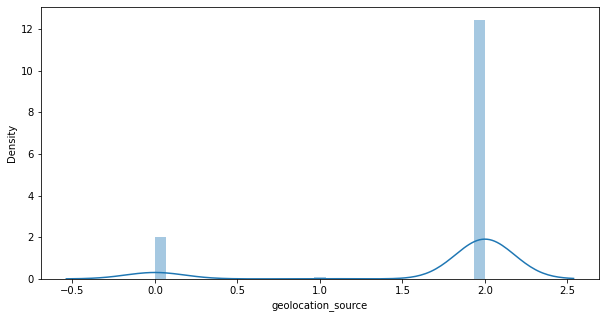

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(df['geolocation_source'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

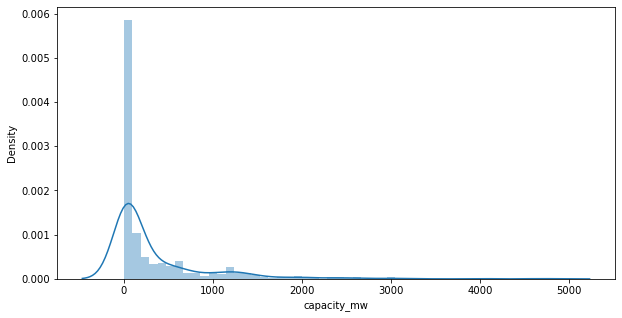

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(df['capacity_mw'])

In [67]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [68]:
x.skew()

name                    -0.289233
gppd_idnr               -0.298330
capacity_mw              0.008407
latitude                -0.087292
longitude                0.012222
commissioning_year      -0.152505
source                  -0.171483
url                      0.077324
geolocation_source      -2.043800
year_of_capacity_data   -0.256830
generation_gwh_2014      0.402210
generation_gwh_2015      0.302359
generation_gwh_2016      0.276068
generation_gwh_2017      0.272566
generation_gwh_2018      0.268576
dtype: float64

In [69]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    dt.fit(x_train,y_train)
    preddt=dt.predict(x_test)
    acc=accuracy_score(y_test,preddt)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Best accuracy:  86.34146341463415  on Random State:  2
[[11  2  0  0  0  0  0  0]
 [ 2 47  4  5  1  0  0  0]
 [ 0  3  4  4  2  1  0  0]
 [ 1  8  2 39  0  2  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.75      0.80      0.77        59
           2       0.33      0.29      0.31        14
           3       0.80      0.75      0.77        52
           4       0.00      0.00      0.00         2
           5       0.25      0.20      0.22         5
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        31

    accuracy                           0.79       205
   macro avg       0.61      0.61      0.61       205
weighted avg       0.79      0.79      0.79       205



In [79]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7908948077210833


# RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Best accuracy:  90.2439024390244  on Random State:  59
[[ 6  7  0  0  0  0  0  0]
 [ 0 53  1  4  0  1  0  0]
 [ 1  3  4  5  0  1  0  0]
 [ 0  9  0 43  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.70      0.90      0.79        59
           2       0.67      0.29      0.40        14
           3       0.81      0.83      0.82        52
           4       0.00      0.00      0.00         2
           5       0.33      0.20      0.25         5
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        31

    accuracy                           0.81       205
   macro avg       0.67      0.58      0.61       205
weighted avg       0.81      0.81      0.80       205



In [74]:
scr=cross_val_score(rf,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.8410444411192579


# KNeighborsClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    kn.fit(x_train,y_train)
    predkn=kn.predict(x_test)
    acc=accuracy_score(y_test,predkn)
    if(acc>maxAcc):
        maxAcc=acc
        maxRS=i
print("Best accuracy: ",maxAcc*100," on Random State: ",maxRS)

print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Best accuracy:  83.41463414634146  on Random State:  41
[[ 9  3  0  0  0  0  0  1]
 [ 2 51  1  4  0  1  0  0]
 [ 1  6  3  3  0  1  0  0]
 [ 0 12  0 40  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  3  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.67      0.86      0.76        59
           2       0.60      0.21      0.32        14
           3       0.82      0.77      0.79        52
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        29
           7       0.97      1.00      0.98        31

    accuracy                           0.80       205
   macro avg       0.60      0.57      0.57       205
weighted avg       0.78      0.80      0.78       205



In [78]:
scr=cross_val_score(kn,x,y)
print('Cross validation score is: ',scr.mean())

Cross validation score is:  0.7542795151877899


In [ ]:
import joblib
joblib.dump(rf,'Global Power Plant Model.pkl')